# Data Processing for Digiviz

## USA

In [2]:
# Import required libraries

# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt 

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx

#Import datareading modules
import fiona
import urllib
from urllib.request import urlopen
import csv
import os
import tempfile
import shutil
from pathlib import Path

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

In [35]:
df= pd.read_excel('data/usa/fhacasesbyyear.xls')

In [36]:
df.head(5)

,Calendar Year Filed,Violation State,Number of Filed Cases,Number of Filed Cases with a Race Basis,Number of Filed Cases with an Asian Race Basis,Number of Filed Cases with an Asian and White Race Basis,Number of Filed Cases with a Black or African-American Race Basis,Number of Filed Cases with a Black and White Race Basis,Number of Filed Cases with a Hawaiian or Pacific-Islander Race Basis,Number of Filed Cases with a Native American Race Basis,...,Number of Administrative Closures,Number of Conciliations and Settlements,Number of Withdrawals after Resolution,Number of No Reasonable Cause Determinations,Number of Department of Justice Closures,Number of Post-Cause Closures by State and Local Partner Agencies,Number of Administrative Law Judge Closures,Number of Elections to Federal District Court,Number of Appeals or Supreme Court Closures,Number of Open Cases
0,2000,Alabama,108,74.0,NaN,NaN,73.0,NaN,NaN,NaN,...,11.0,16.0,16.0,63.0,2.0,NaN,NaN,NaN,NaN,NaN
1,2000,Alaska,6,2.0,NaN,NaN,1.0,NaN,NaN,1.0,...,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Arizona,162,44.0,1.0,NaN,37.0,NaN,NaN,1.0,...,8.0,46.0,11.0,79.0,NaN,17.0,NaN,NaN,NaN,NaN
3,2000,Arkansas,67,35.0,NaN,NaN,34.0,NaN,NaN,NaN,...,6.0,19.0,6.0,35.0,NaN,NaN,1.0,NaN,NaN,NaN
4,2000,California,824,246.0,NaN,NaN,227.0,NaN,NaN,4.0,...,116.0,177.0,68.0,422.0,2.0,35.0,NaN,1.0,NaN,NaN


In [37]:
# rename the states
df.rename(columns={'Violation State': 'NAME'}, inplace=True)

In [38]:
df.head(5)

,Calendar Year Filed,NAME,Number of Filed Cases,Number of Filed Cases with a Race Basis,Number of Filed Cases with an Asian Race Basis,Number of Filed Cases with an Asian and White Race Basis,Number of Filed Cases with a Black or African-American Race Basis,Number of Filed Cases with a Black and White Race Basis,Number of Filed Cases with a Hawaiian or Pacific-Islander Race Basis,Number of Filed Cases with a Native American Race Basis,...,Number of Administrative Closures,Number of Conciliations and Settlements,Number of Withdrawals after Resolution,Number of No Reasonable Cause Determinations,Number of Department of Justice Closures,Number of Post-Cause Closures by State and Local Partner Agencies,Number of Administrative Law Judge Closures,Number of Elections to Federal District Court,Number of Appeals or Supreme Court Closures,Number of Open Cases
0,2000,Alabama,108,74.0,NaN,NaN,73.0,NaN,NaN,NaN,...,11.0,16.0,16.0,63.0,2.0,NaN,NaN,NaN,NaN,NaN
1,2000,Alaska,6,2.0,NaN,NaN,1.0,NaN,NaN,1.0,...,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Arizona,162,44.0,1.0,NaN,37.0,NaN,NaN,1.0,...,8.0,46.0,11.0,79.0,NaN,17.0,NaN,NaN,NaN,NaN
3,2000,Arkansas,67,35.0,NaN,NaN,34.0,NaN,NaN,NaN,...,6.0,19.0,6.0,35.0,NaN,NaN,1.0,NaN,NaN,NaN
4,2000,California,824,246.0,NaN,NaN,227.0,NaN,NaN,4.0,...,116.0,177.0,68.0,422.0,2.0,35.0,NaN,1.0,NaN,NaN


In [12]:
file = 'data/usa/us_cartographic_boundary_state.geojson'
usa_gdf = gpd.read_file(file)

<AxesSubplot:>

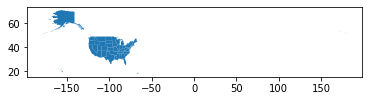

In [13]:
usa_gdf.plot()

In [11]:
usa_bound.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
0,271.25438,227.17142,2,1,02,Alaska,01,4,9,None,"MULTIPOLYGON (((-147.78711 70.24536, -147.7651..."
1,0.00375,0.34984,3,2,02,Alaska,01,4,9,None,"MULTIPOLYGON (((-166.05315 66.26494, -166.0318..."
2,0.00150,0.15353,4,3,02,Alaska,01,4,9,None,"MULTIPOLYGON (((-168.89322 65.74470, -168.8987..."
3,0.03130,0.71223,5,4,02,Alaska,01,4,9,None,"MULTIPOLYGON (((-168.21012 64.99896, -168.2079..."
4,0.88934,7.36032,6,5,02,Alaska,01,4,9,None,"MULTIPOLYGON (((-171.73986 63.71712, -171.7332..."


In [19]:
df

,Calendar Year Filed,Violation State,Number of Filed Cases,Number of Filed Cases with a Race Basis,Number of Filed Cases with an Asian Race Basis,Number of Filed Cases with an Asian and White Race Basis,Number of Filed Cases with a Black or African-American Race Basis,Number of Filed Cases with a Black and White Race Basis,Number of Filed Cases with a Hawaiian or Pacific-Islander Race Basis,Number of Filed Cases with a Native American Race Basis,...,Number of Administrative Closures,Number of Conciliations and Settlements,Number of Withdrawals after Resolution,Number of No Reasonable Cause Determinations,Number of Department of Justice Closures,Number of Post-Cause Closures by State and Local Partner Agencies,Number of Administrative Law Judge Closures,Number of Elections to Federal District Court,Number of Appeals or Supreme Court Closures,Number of Open Cases
0,2000,Alabama,108,74.0,NaN,NaN,73.0,NaN,NaN,NaN,...,11.0,16.0,16.0,63.0,2.0,NaN,NaN,NaN,NaN,NaN
1,2000,Alaska,6,2.0,NaN,NaN,1.0,NaN,NaN,1.0,...,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Arizona,162,44.0,1.0,NaN,37.0,NaN,NaN,1.0,...,8.0,46.0,11.0,79.0,NaN,17.0,NaN,NaN,NaN,NaN
3,2000,Arkansas,67,35.0,NaN,NaN,34.0,NaN,NaN,NaN,...,6.0,19.0,6.0,35.0,NaN,NaN,1.0,NaN,NaN,NaN
4,2000,California,824,246.0,NaN,NaN,227.0,NaN,NaN,4.0,...,116.0,177.0,68.0,422.0,2.0,35.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,2019,Washington,193,39.0,2.0,1.0,28.0,2.0,1.0,3.0,...,10.0,49.0,6.0,108.0,NaN,1.0,NaN,NaN,NaN,17.0
1074,2019,West Virginia,18,5.0,NaN,NaN,5.0,NaN,NaN,NaN,...,1.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,8.0
1075,2019,Wisconsin,68,13.0,NaN,NaN,11.0,1.0,NaN,1.0,...,19.0,24.0,16.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0
1076,2019,Wyoming,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0


In [16]:
# Identifying NA values in rows of geometry
usa_gdf[usa_gdf.isna()]

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


<AxesSubplot:>

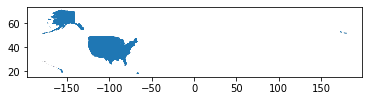

In [39]:
# Join housing file cases data with USA boundary by attribute NAME
filed_gdf = usa_gdf.merge(df, on = 'NAME', how = 'left')
filed_gdf.plot()

In [41]:
filed_gdf.to_csv('data/usa/housing_filed_cases.csv')

# USA Urban Area Data

In [48]:
file = 'data/usa/urbanareas/tl_2018_us_uac10/tl_2018_us_uac10.shp'
usurban18 = gpd.read_file(file)

<AxesSubplot:>

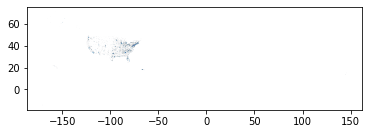

In [49]:
usurban18.plot()

In [50]:
file = 'data/usa/urbanareas/tl_2008_us_uac00/tl_2008_us_uac00.shp'
usurban08 = gpd.read_file(file)

<AxesSubplot:>

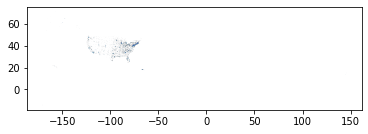

In [51]:
usurban08.plot()

In [52]:
# Merge/Combine multiple shapefiles into one
usurbanall = gpd.pd.concat([usurban08, usurban18])

In [53]:
#Export merged geodataframe into shapefile
usurbanall.to_file("data/usa/usurbanall.shp")

<AxesSubplot:>

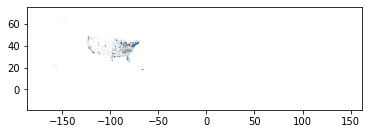

In [57]:
usurbanall.plot()

In [59]:
usurbanall.to_csv('data/usa/usurbanall.csv')

In [ ]:
file = 'data/usa/usurbanall.csv'
usurbanall = gpd.read_file(file)

In [61]:
usurbanall

,UACE00,NAME00,NAMELSAD00,LSAD00,MTFCC00,FUNCSTAT00,geometry,UACE10,GEOID10,NAME10,NAMELSAD10,LSAD10,MTFCC10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
0,21016,"Creston, IA","Creston, IA Urban Cluster",76,G3500,S,"POLYGON ((-94.38236 41.04811, -94.38047 41.049...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32626,"Garnett, KS","Garnett, KS Urban Cluster",76,G3500,S,"POLYGON ((-95.25182 38.28833, -95.25151 38.288...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47881,"Larned, KS","Larned, KS Urban Cluster",76,G3500,S,"MULTIPOLYGON (((-99.13748 38.17818, -99.13678 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78283,"Salina, KS","Salina, KS Urban Cluster",76,G3500,S,"MULTIPOLYGON (((-97.64526 38.83928, -97.64489 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32032,"Fulton, KY--TN","Fulton, KY--TN Urban Cluster",76,G3500,S,"MULTIPOLYGON (((-88.92482 36.48990, -88.92481 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-84.30242 42.69377, -84.30236 ...",95482,95482,"Williamston, MI","Williamston, MI Urban Cluster",76,G3500,C,S,10894352.0,243568.0,+42.6866692,-084.2572215
3597,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-84.19986 43.65057, -84.19703 ...",56980,56980,"Midland, MI","Midland, MI Urbanized Area",75,G3500,U,S,116236824.0,3741582.0,+43.6163010,-084.2198783
3598,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-84.25746 42.10875, -84.25746 42.110...",10675,10675,"Brooklyn, MI","Brooklyn, MI Urban Cluster",76,G3500,C,S,7677056.0,129296.0,+42.1020619,-084.2748473
3599,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-74.58574 41.19401, -74.58563 ...",31450,31450,"Franklin--Highland Lake, NJ","Franklin--Highland Lake, NJ Urban Cluster",76,G3500,C,S,84336261.0,3305453.0,+41.1692099,-074.5460821


In [42]:
file = 'data/usa/urbanareas23.geojson'
usurban_gdf = gpd.read_file(file)

<AxesSubplot:>

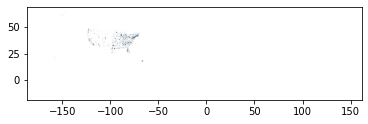

In [43]:
usurban_gdf.plot()

In [45]:
usurban_gdf.head(5)

,UACE20,GEOID20,NAME20,NAMELSAD20,LSAD20,MTFCC20,UATYP20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,67240,67240,"Pampa, TX","Pampa, TX Urban Area",67,G3500,U,S,21374659,0,+35.5451610,-100.9656498,"MULTIPOLYGON (((-100.94529 35.53833, -100.9452..."
1,23230,23230,"Delta, CO","Delta, CO Urban Area",67,G3500,U,S,16126572,129608,+38.7454236,-108.0619343,"MULTIPOLYGON (((-108.04131 38.74094, -108.0410..."
2,36001,36001,"Gunnison, CO","Gunnison, CO Urban Area",67,G3500,U,S,9468678,11725,+38.5405505,-106.9384998,"MULTIPOLYGON (((-106.92674 38.53565, -106.9279..."
3,45775,45775,"Kuna, ID","Kuna, ID Urban Area",67,G3500,U,S,16384896,46009,+43.5010643,-116.4168990,"MULTIPOLYGON (((-116.39896 43.48833, -116.3988..."
4,05410,05410,"Basalt, CO","Basalt, CO Urban Area",67,G3500,U,S,9433311,68797,+39.3835983,-107.0807354,"MULTIPOLYGON (((-107.11050 39.40463, -107.1104..."


# Global Housing Price Index (HPI)

In [114]:
file = 'data/global/World_Countries/World_Countries__Generalized_.shp'
world = gpd.read_file(file)

<AxesSubplot:>

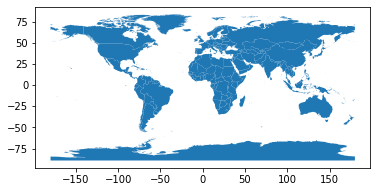

In [115]:
world.plot()

In [116]:
world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


In [117]:
globalhpi = pd.read_excel('data/global/HPIcountry.xlsx')

In [118]:
globalhpi

,TL,Territory Level and Typology,REG_ID,Region,VAR,Variable,Vintage2,Dwellings3,Measure4,Time5,Value
0,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2004,55.647
1,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2005,56.665
2,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2006,60.579
3,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2007,66.960
4,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2008,69.603
...,...,...,...,...,...,...,...,...,...,...,...
8740,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2018,116.925
8741,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2019,121.954
8742,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2020,126.722
8743,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2021,136.473


In [119]:
# rename the country
globalhpi.rename(columns={'Region': 'COUNTRYAFF'}, inplace=True)

In [120]:
globalhpi

,TL,Territory Level and Typology,REG_ID,COUNTRYAFF,VAR,Variable,Vintage2,Dwellings3,Measure4,Time5,Value
0,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2004,55.647
1,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2005,56.665
2,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2006,60.579
3,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2007,66.960
4,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2008,69.603
...,...,...,...,...,...,...,...,...,...,...,...
8740,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2018,116.925
8741,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2019,121.954
8742,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2020,126.722
8743,1,Country,JPN,Japan,RHPI,House Price Index,Total,Multi-Family,Index publication base SA,2021,136.473


In [110]:
globalhpi08 = globalhpi.loc[globalhpi['Time5'] == 2008]

In [111]:
globalhpi08

,TL,Territory Level and Typology,REG_ID,COUNTRYAFF,VAR,Variable,Vintage2,Dwellings3,Measure4,Time5,Value
4,1,Country,AUS,Australia,RHPI,House Price Index,Total,Total,Index publication base,2008,69.603
60,1,Country,BEL,Belgium,RHPI,House Price Index,Total,Total,Index publication base,2008,89.605
78,1,Country,BEL,Belgium,RHPI,House Price Index,Existing,Total,Index publication base,2008,89.400
96,1,Country,BEL,Belgium,RHPI,House Price Index,New,Total,Index publication base,2008,89.974
117,1,Country,CHL,Chile,RHPI,House Price Index,Total,Total,Index publication base,2008,51.637
...,...,...,...,...,...,...,...,...,...,...,...
8467,1,Country,EST,Estonia,RHPI,House Price Index,Total,Single-Family,Percentage change on the same period of the pr...,2008,-4.536
8495,1,Country,EST,Estonia,RHPI,House Price Index,Total,Multi-Family,Percentage change from previous period,2008,-11.465
8511,1,Country,EST,Estonia,RHPI,House Price Index,Total,Single-Family,Percentage change from previous period,2008,-4.536
8527,1,Country,EST,Estonia,RHPI,House Price Index,Total,Multi-Family,Percentage change on the same period of the pr...,2008,-11.465


<AxesSubplot:>

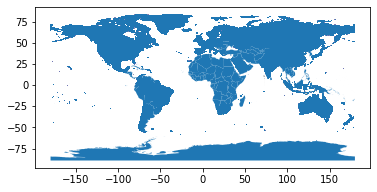

In [121]:
# Join hpi data with world boundary by attribute COUNTRYAFF
hpi = world.merge(globalhpi, on = 'COUNTRYAFF', how = 'left')
hpi.plot()

In [123]:
hpi

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,TL,Territory Level and Typology,REG_ID,VAR,Variable,Vintage2,Dwellings3,Measure4,Time5,Value
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",1.0,Country,USA,RHPI,House Price Index,Existing,Single-Family,Index publication base,1975.0,17.122
4,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",1.0,Country,USA,RHPI,House Price Index,Existing,Single-Family,Index publication base,1976.0,18.356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27898,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",1.0,Country,FRA,RHPI,House Price Index,Existing,Multi-Family,Percentage change from previous period SA,2021.0,4.884
27899,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",1.0,Country,FRA,RHPI,House Price Index,Existing,Multi-Family,Percentage change from previous period SA,2022.0,4.260
27900,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27901,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Global Crisis Data

In [157]:
globalcrisis = pd.read_excel('data/global/globalcrisis0016.xlsx')

In [158]:
globalcrisis

,CC3,Country,Year,Banking Crisis,"Inflation, Annual percentages of average consumer prices",Currency Crises
0,DZA,Algeria,2000,0.0,0.300,0
1,DZA,Algeria,2001,0.0,4.200,0
2,DZA,Algeria,2002,0.0,1.430,0
3,DZA,Algeria,2003,0.0,4.259,0
4,DZA,Algeria,2004,0.0,3.972,0
...,...,...,...,...,...,...
1185,ZWE,Zimbabwe,2012,0.0,3.720,0
1186,ZWE,Zimbabwe,2013,0.0,1.632,0
1187,ZWE,Zimbabwe,2014,0.0,-0.213,0
1188,ZWE,Zimbabwe,2015,NaN,-2.399,0


In [159]:
globalcrisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   CC3                                                       1190 non-null   object 
 1   Country                                                   1190 non-null   object 
 2   Year                                                      1190 non-null   int64  
 3   Banking Crisis                                            1015 non-null   float64
 4   Inflation, Annual percentages of average consumer prices  1187 non-null   float64
 5   Currency Crises                                           1190 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 55.9+ KB


In [162]:
globalcrisis

,CC3,Country,Year,Banking Crisis,"Inflation, Annual percentages of average consumer prices",Currency Crises
0,DZA,Algeria,2000,0.0,0.300,0
1,DZA,Algeria,2001,0.0,4.200,0
2,DZA,Algeria,2002,0.0,1.430,0
3,DZA,Algeria,2003,0.0,4.259,0
4,DZA,Algeria,2004,0.0,3.972,0
...,...,...,...,...,...,...
1185,ZWE,Zimbabwe,2012,0.0,3.720,0
1186,ZWE,Zimbabwe,2013,0.0,1.632,0
1187,ZWE,Zimbabwe,2014,0.0,-0.213,0
1188,ZWE,Zimbabwe,2015,NaN,-2.399,0


In [132]:
#pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 7.5 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.4 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.9/123.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 k

In [133]:
import dataprep
from dataprep.clean import clean_country

In [141]:
globalcrisis = clean_country(globalcrisis, 'CC3', output_format='alpha-2')

  0%|          | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	15190 values cleaned (99.99%)
Result contains 15190 (99.99%) values in the correct format and 1 null values (0.01%)


In [142]:
# rename the country
globalcrisis.rename(columns={'CC3_clean': 'ISO'}, inplace=True)

In [143]:
globalcrisis

,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises,ISO
0,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN,NaN,...,x,NaN,NaN,x,x,NaN,x,x,x,NaN
1,1.0,DZA,Algeria,1800.0,0,NaN,0,0,NaN,NaN,...,0,0.0,NaN,0,NaN,NaN,0,0,0,DZ
2,1.0,DZA,Algeria,1801.0,0,NaN,0,0,NaN,NaN,...,0,0.0,NaN,0,NaN,NaN,0,0,0,DZ
3,1.0,DZA,Algeria,1802.0,0,NaN,0,0,NaN,NaN,...,0,0.0,NaN,0,NaN,NaN,0,0,0,DZ
4,1.0,DZA,Algeria,1803.0,0,NaN,0,0,NaN,NaN,...,0,0.0,NaN,0,NaN,NaN,0,0,0,DZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15186,70.0,ZWE,Zimbabwe,2012.0,0,NaN,0,NaN,361.9,NaN,...,1,1.0,NaN,0,0,3.72,1,0,0,ZW
15187,70.0,ZWE,Zimbabwe,2013.0,0,NaN,0,NaN,361.9,NaN,...,1,1.0,NaN,0,0,1.632,1,0,0,ZW
15188,70.0,ZWE,Zimbabwe,2014.0,0,NaN,0,NaN,NaN,NaN,...,1,1.0,NaN,0,0,-0.213,1,0,0,ZW
15189,70.0,ZWE,Zimbabwe,2015.0,NaN,NaN,0,NaN,NaN,NaN,...,1,1.0,NaN,0,NaN,-2.399,1,0,0,ZW


<AxesSubplot:>

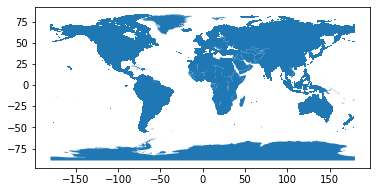

In [144]:
# Join hpi data with world boundary by attribute COUNTRYAFF
globalcrisis = world.merge(globalcrisis, on = 'ISO', how = 'left')
globalcrisis.plot()

In [146]:
globalcrisis

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Case,CC3,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",1.0,DZA,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
3,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",1.0,DZA,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
4,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",1.0,DZA,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15798,251,Zimbabwe,ZW,Zimbabwe,ZW,26.298426,33.463130,"POLYGON ((32.48887 -21.34445, 32.46541 -21.325...",70.0,ZWE,...,NaN,1,1.0,NaN,0,0,3.72,1,0,0
15799,251,Zimbabwe,ZW,Zimbabwe,ZW,26.298426,33.463130,"POLYGON ((32.48887 -21.34445, 32.46541 -21.325...",70.0,ZWE,...,NaN,1,1.0,NaN,0,0,1.632,1,0,0
15800,251,Zimbabwe,ZW,Zimbabwe,ZW,26.298426,33.463130,"POLYGON ((32.48887 -21.34445, 32.46541 -21.325...",70.0,ZWE,...,NaN,1,1.0,NaN,0,0,-0.213,1,0,0
15801,251,Zimbabwe,ZW,Zimbabwe,ZW,26.298426,33.463130,"POLYGON ((32.48887 -21.34445, 32.46541 -21.325...",70.0,ZWE,...,NaN,1,1.0,NaN,0,NaN,-2.399,1,0,0


# Banking Crisis Data

In [148]:
bankcrisis = pd.read_excel('data/global/bankingcrisis-0016.xlsx')

In [149]:
bankcrisis

,CC3,Country,Year,Banking Crisis
0,DZA,Algeria,1969,0.0
1,DZA,Algeria,1970,0.0
2,DZA,Algeria,1971,0.0
3,DZA,Algeria,1972,0.0
4,DZA,Algeria,1973,0.0
...,...,...,...,...
3355,ZWE,Zimbabwe,2012,0.0
3356,ZWE,Zimbabwe,2013,0.0
3357,ZWE,Zimbabwe,2014,0.0
3358,ZWE,Zimbabwe,2015,NaN


In [ ]:
from dataprep.clean import clean_country

In [152]:
housing = pd.read_csv('trial/data/housing_filed_cases.csv')

In [154]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 44 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed: 0                                                            5298 non-null   int64  
 1   AREA                                                                  5298 non-null   float64
 2   PERIMETER                                                             5298 non-null   float64
 3   ST99_D00_                                                             5298 non-null   int64  
 4   ST99_D00_I                                                            5298 non-null   int64  
 5   STATE                                                                 5298 non-null   int64  
 6   NAME                                                                  5298 non-null   object 
 7